In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as sts
from numpy import *


In [4]:
base = pd.read_csv('dados.csv', sep=';')
base = base.drop_duplicates('CODIGO',keep='last')
base

,CODIGO,MUNICIPIO,PIB,VALOREMPENHO
0,106,SANTANA DO LIVRAMENTO,12240.76,1088666.10
1,113,SANTO ANGELO,16575.82,800669.92
2,118,SAO FRANCISCO DE ASSIS,12037.61,466122.80
3,13,CACAPAVA DO SUL,13674.54,485535.86
4,120,SAO GABRIEL,19912.38,533719.86
...,...,...,...,...
182,372,SANTA VITORIA DO PALMAR,27170.89,760.00
183,107,SANTA BARBARA DO SUL,29654.02,365.00
184,54,GETULIO VARGAS,16876.33,233.01
185,382,NOVA SANTA RITA,25938.38,310.58


In [48]:
base.isnull().sum()

CODIGO          0
MUNICIPIO       0
PIB             0
VALOREMPENHO    0
dtype: int64

In [49]:
base[base.duplicated(['CODIGO'], keep='first')]

,CODIGO,MUNICIPIO,PIB,VALOREMPENHO


In [50]:
base.loc[base.MUNICIPIO == 'CERRO BRANCO', 'CODIGO'] = 497

In [51]:
base[base.drop_duplicates(['CODIGO'], keep='first', inplace=True)]

KeyError: None

In [ ]:
codigos_em_ordem = base.sort_values(['CODIGO'])
codigos_em_ordem.tail(30)

,CODIGO,MUNICIPIO,PIB,VALOREMPENHO
89,413,SAO VALERIO DO SUL,10503.72,67638.25
66,414,SENTINELA DO SUL,10477.52,92380.20
61,418,TIRADENTES DO SUL,11460.58,107111.00
159,421,TUPANCI DO SUL,17206.19,30868.49
149,422,UNIAO DA SERRA,25746.93,56890.56
105,423,VALE DO SOL,15438.03,65811.24
45,425,VILA NOVA DO SUL,13053.13,141895.69
62,436,CHUI,27211.85,191953.50
108,439,DILERMANDO DE AGUIAR,19759.20,74348.22
35,440,DOM PEDRO DE ALCANTARA,11846.92,151929.31


In [52]:
base.loc[base.PIB >= 60000.00]

,CODIGO,MUNICIPIO,PIB,VALOREMPENHO
49,149,TRIUNFO,223848.22,1442759.82
91,356,GARRUCHOS,68672.25,271841.26
146,453,MUITOS CAPOES,72353.72,140597.55


In [ ]:
base.loc[(base.PIB >= 30000.00)]



,CODIGO,MUNICIPIO,PIB,VALOREMPENHO
49,149,TRIUNFO,223848.22,1442759.82
68,75,MARAU,34568.53,193840.83
91,356,GARRUCHOS,68672.25,271841.26
106,273,EUGENIO DE CASTRO,30468.92,105023.36
145,276,GLORINHA,33730.13,74325.48
146,453,MUITOS CAPOES,72353.72,140597.55
155,476,CAPAO DO CIPO,36739.78,60851.00
169,329,VILA MARIA,31104.22,28149.89
175,96,PORTO ALEGRE,30524.80,9358.33
176,108,SANTA CRUZ DO SUL,40671.53,9637.00


In [ ]:
base.loc[base.VALOREMPENHO >= 600000.00]

,CODIGO,MUNICIPIO,PIB,VALOREMPENHO
0,106,SANTANA DO LIVRAMENTO,12240.76,1088666.10
1,113,SANTO ANGELO,16575.82,800669.92
49,149,TRIUNFO,223848.22,1442759.82


<Axes: xlabel='PIB', ylabel='VALOREMPENHO'>

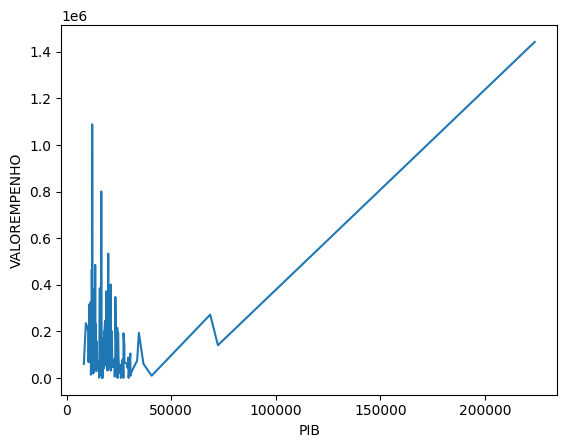

In [ ]:
sns.lineplot(data=base, x = base.PIB, y = base.VALOREMPENHO)

[Text(0.5, 1.0, 'PIB')]

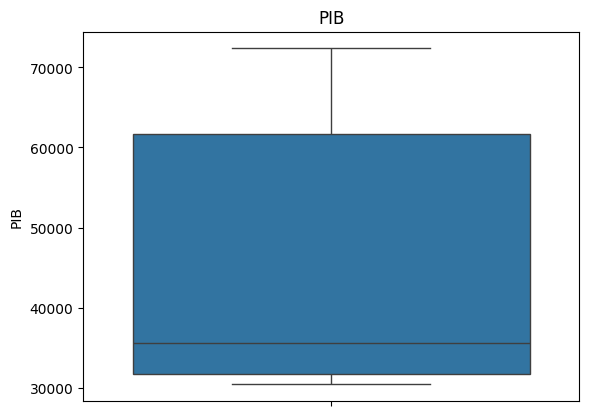

In [ ]:
sns.boxplot(base.PIB.loc[base.PIB >= 30000.00], showfliers=False).set(title='PIB')

<Axes: xlabel='PIB', ylabel='VALOREMPENHO'>

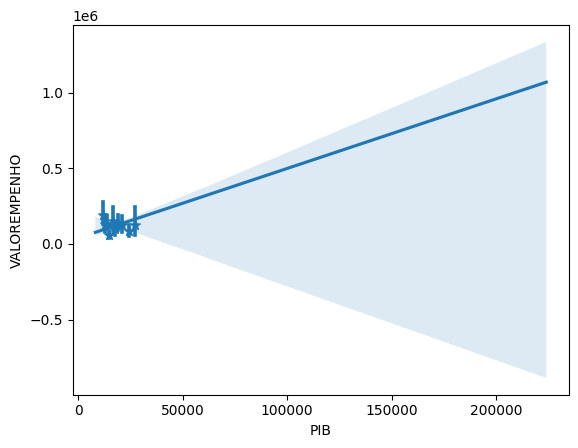

In [ ]:
sns.regplot(data=base, x = base.PIB, y = base.VALOREMPENHO, x_jitter=0.5, fit_reg=True, marker='*', x_bins=10)

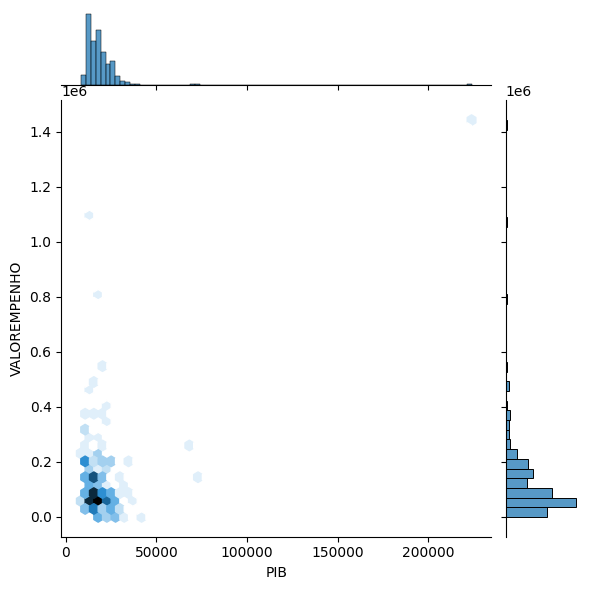

In [ ]:
sns.jointplot(data=base, x = base.PIB, y = base.VALOREMPENHO, kind='hex')

In [ ]:
sts.covariance(base.PIB, base.VALOREMPENHO)

1329329533.5908442

[Text(0.5, 1.0, 'PIB')]

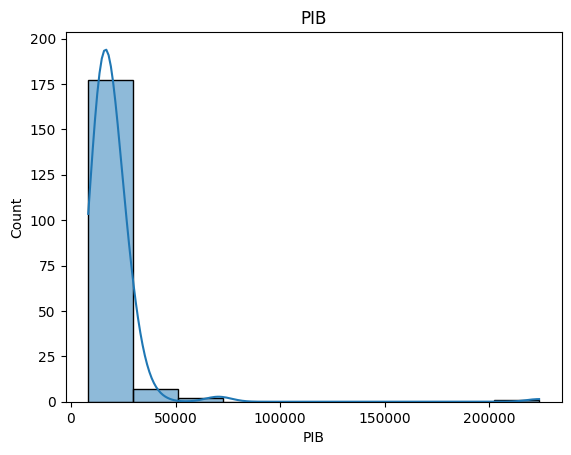

In [ ]:
sns.histplot(data=base.PIB, kde=True, bins=10).set(title='PIB')

[Text(0.5, 1.0, 'Valor Empenho')]

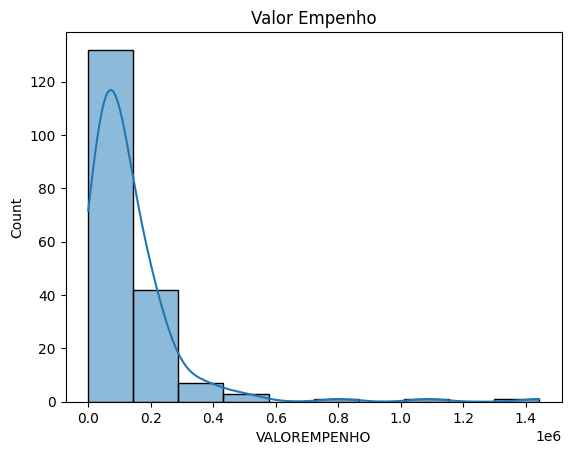

In [ ]:
sns.histplot(base.VALOREMPENHO, kde=True, bins=10).set(title='Valor Empenho')

<Axes: xlabel='MUNICIPIO'>

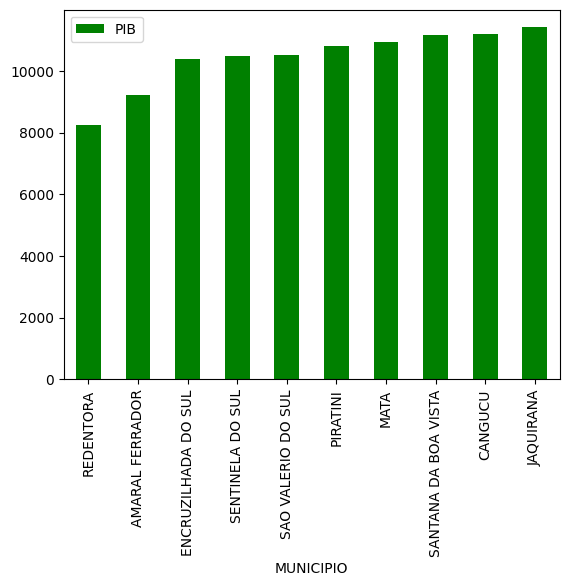

In [ ]:
top10PIB = base.sort_values('PIB').head(10)
top10PIB = top10PIB.iloc[:,1:3]
top10PIB.plot.bar(x='MUNICIPIO', y='PIB', color='green')


<Axes: xlabel='MUNICIPIO'>

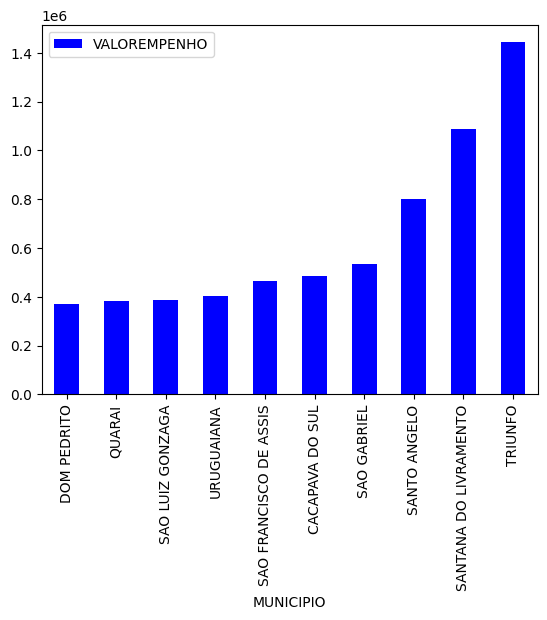

In [9]:
top10Empenho = base.sort_values('VALOREMPENHO').tail(10)
top10Empenho = top10Empenho.iloc[:,[1,3]]
top10Empenho.plot.bar(x='MUNICIPIO', y='VALOREMPENHO', color='blue')


In [7]:
base.sort_values('VALOREMPENHO').head(10)


,CODIGO,MUNICIPIO,PIB,VALOREMPENHO
186,60,GUARANI DAS MISSOES,24363.31,172.13
184,54,GETULIO VARGAS,16876.33,233.01
185,382,NOVA SANTA RITA,25938.38,310.58
183,107,SANTA BARBARA DO SUL,29654.02,365.00
182,372,SANTA VITORIA DO PALMAR,27170.89,760.00
178,129,SAO SEPE,15525.66,1186.00
177,65,IJUI,23027.95,5920.00
175,96,PORTO ALEGRE,30524.80,9358.33
173,109,SANTA MARIA,15719.56,9538.34
176,108,SANTA CRUZ DO SUL,40671.53,9637.00


In [8]:
base.sort_values('VALOREMPENHO').tail(10)

,CODIGO,MUNICIPIO,PIB,VALOREMPENHO
10,36,DOM PEDRITO,19013.71,371857.25
5,98,QUARAI,12552.51,381286.24
8,126,SAO LUIZ GONZAGA,15887.14,385185.68
9,153,URUGUAIANA,21084.19,401124.62
2,118,SAO FRANCISCO DE ASSIS,12037.61,466122.80
3,13,CACAPAVA DO SUL,13674.54,485535.86
4,120,SAO GABRIEL,19912.38,533719.86
1,113,SANTO ANGELO,16575.82,800669.92
0,106,SANTANA DO LIVRAMENTO,12240.76,1088666.10
49,149,TRIUNFO,223848.22,1442759.82


In [69]:
base.drop(columns='PIBxEMPENHO', inplace=True)
base.head()

,CODIGO,MUNICIPIO,PIB,VALOREMPENHO,PIBxEMPENHO_PERCENTUAL
0,106,SANTANA DO LIVRAMENTO,12240.76,1088666.10,1.12
1,113,SANTO ANGELO,16575.82,800669.92,2.07
2,118,SAO FRANCISCO DE ASSIS,12037.61,466122.80,2.58
3,13,CACAPAVA DO SUL,13674.54,485535.86,2.82
4,120,SAO GABRIEL,19912.38,533719.86,3.73


In [121]:
x = ((base.VALOREMPENHO/base.PIB) * 100)
base = base.assign(PIBxEMPENHO_PERCENTUAL=x)
base.head()

,CODIGO,MUNICIPIO,PIB,VALOREMPENHO,PIBxEMPENHO_PERCENTUAL
0,106,SANTANA DO LIVRAMENTO,12240.76,1088666.10,8893.778654
1,113,SANTO ANGELO,16575.82,800669.92,4830.348785
2,118,SAO FRANCISCO DE ASSIS,12037.61,466122.80,3872.220482
3,13,CACAPAVA DO SUL,13674.54,485535.86,3550.655890
4,120,SAO GABRIEL,19912.38,533719.86,2680.341878


In [132]:
base.sort_values('PIBxEMPENHO_PERCENTUAL')

,CODIGO,MUNICIPIO,PIB,VALOREMPENHO,PIBxEMPENHO_PERCENTUAL
186,60,GUARANI DAS MISSOES,24363.31,172.13,0.706513
185,382,NOVA SANTA RITA,25938.38,310.58,1.197376
183,107,SANTA BARBARA DO SUL,29654.02,365.00,1.230862
184,54,GETULIO VARGAS,16876.33,233.01,1.380691
182,372,SANTA VITORIA DO PALMAR,27170.89,760.00,2.797111
...,...,...,...,...,...
5,98,QUARAI,12552.51,381286.24,3037.529865
3,13,CACAPAVA DO SUL,13674.54,485535.86,3550.655890
2,118,SAO FRANCISCO DE ASSIS,12037.61,466122.80,3872.220482
1,113,SANTO ANGELO,16575.82,800669.92,4830.348785


<Axes: xlabel='PIBxEMPENHO_PERCENTUAL', ylabel='Count'>

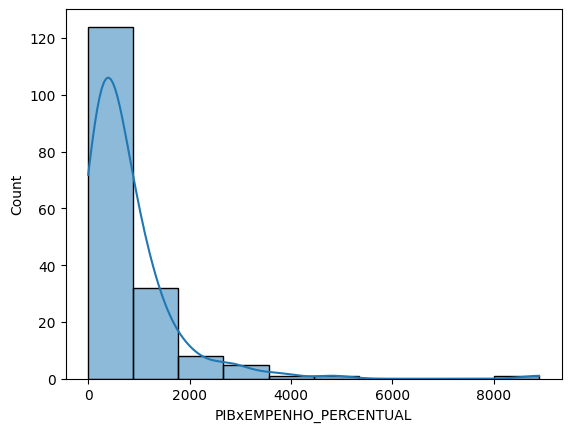

In [133]:
sns.histplot(base.PIBxEMPENHO_PERCENTUAL,bins=10, kde=True)

In [131]:
base.head()

,CODIGO,MUNICIPIO,PIB,VALOREMPENHO,PIBxEMPENHO_PERCENTUAL
0,106,SANTANA DO LIVRAMENTO,12240.76,1088666.10,8893.778654
1,113,SANTO ANGELO,16575.82,800669.92,4830.348785
2,118,SAO FRANCISCO DE ASSIS,12037.61,466122.80,3872.220482
3,13,CACAPAVA DO SUL,13674.54,485535.86,3550.655890
4,120,SAO GABRIEL,19912.38,533719.86,2680.341878


In [130]:
base.tail()

,CODIGO,MUNICIPIO,PIB,VALOREMPENHO,PIBxEMPENHO_PERCENTUAL
182,372,SANTA VITORIA DO PALMAR,27170.89,760.00,2.797111
183,107,SANTA BARBARA DO SUL,29654.02,365.00,1.230862
184,54,GETULIO VARGAS,16876.33,233.01,1.380691
185,382,NOVA SANTA RITA,25938.38,310.58,1.197376
186,60,GUARANI DAS MISSOES,24363.31,172.13,0.706513
